In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

# Read the data
cars_data = pd.read_csv('quikr_car.csv')

# Create a backup of the original dataset
cars_backup = cars_data.copy()

cars_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [10]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
# Convert 'year' from object to integer
cars_data = cars_data[cars_data['year'].str.isnumeric()]
cars_data['year'] = cars_data['year'].astype(int)

# Convert 'Price' from object to integer, remove commas and 'Ask For Price' tags
cars_data = cars_data[cars_data['Price'] != 'Ask For Price']
cars_data['Price'] = cars_data['Price'].str.replace(',', '').astype(int)

# Convert 'kms_driven' from object to integer and remove unnecessary string part
cars_data['kms_driven'] = cars_data['kms_driven'].str.split().str.get(0).str.replace(',', '')
cars_data = cars_data[cars_data['kms_driven'].str.isnumeric()]
cars_data['kms_driven'] = cars_data['kms_driven'].astype(int)



In [11]:
# Drop rows where 'fuel_type' has NaN values
cars_data = cars_data[~cars_data['fuel_type'].isna()]

# Simplify the 'name' column by keeping only the first three words
cars_data['name'] = cars_data['name'].str.split().str.slice(start=0, stop=3).str.join(' ')

# Reset index
cars_data = cars_data.reset_index(drop=True)

# Save cleaned data to a new CSV file
cars_data.to_csv('Cleaned_Car_Data.csv')

cars_data.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium,Ford,2014,"5,75,000","36,000 kms",Diesel


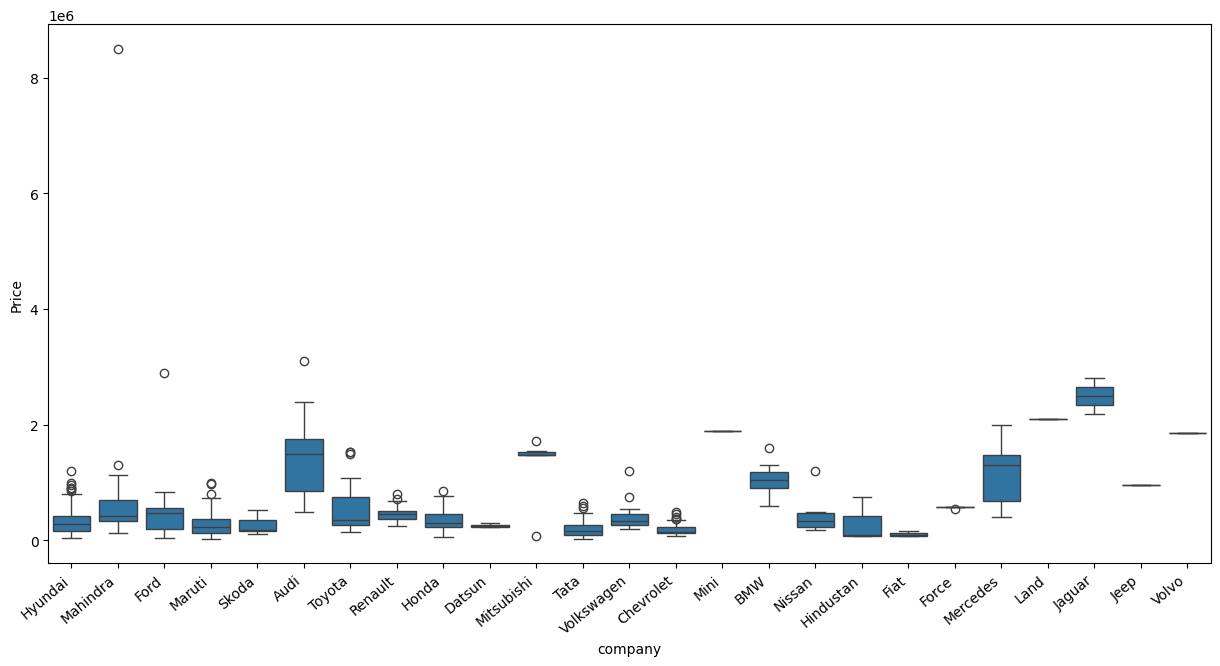

/Users/rudranighosh/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 15.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/rudranighosh/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/rudranighosh/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/rudranighosh/anaconda/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:3370: UserWarning: 36.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Use

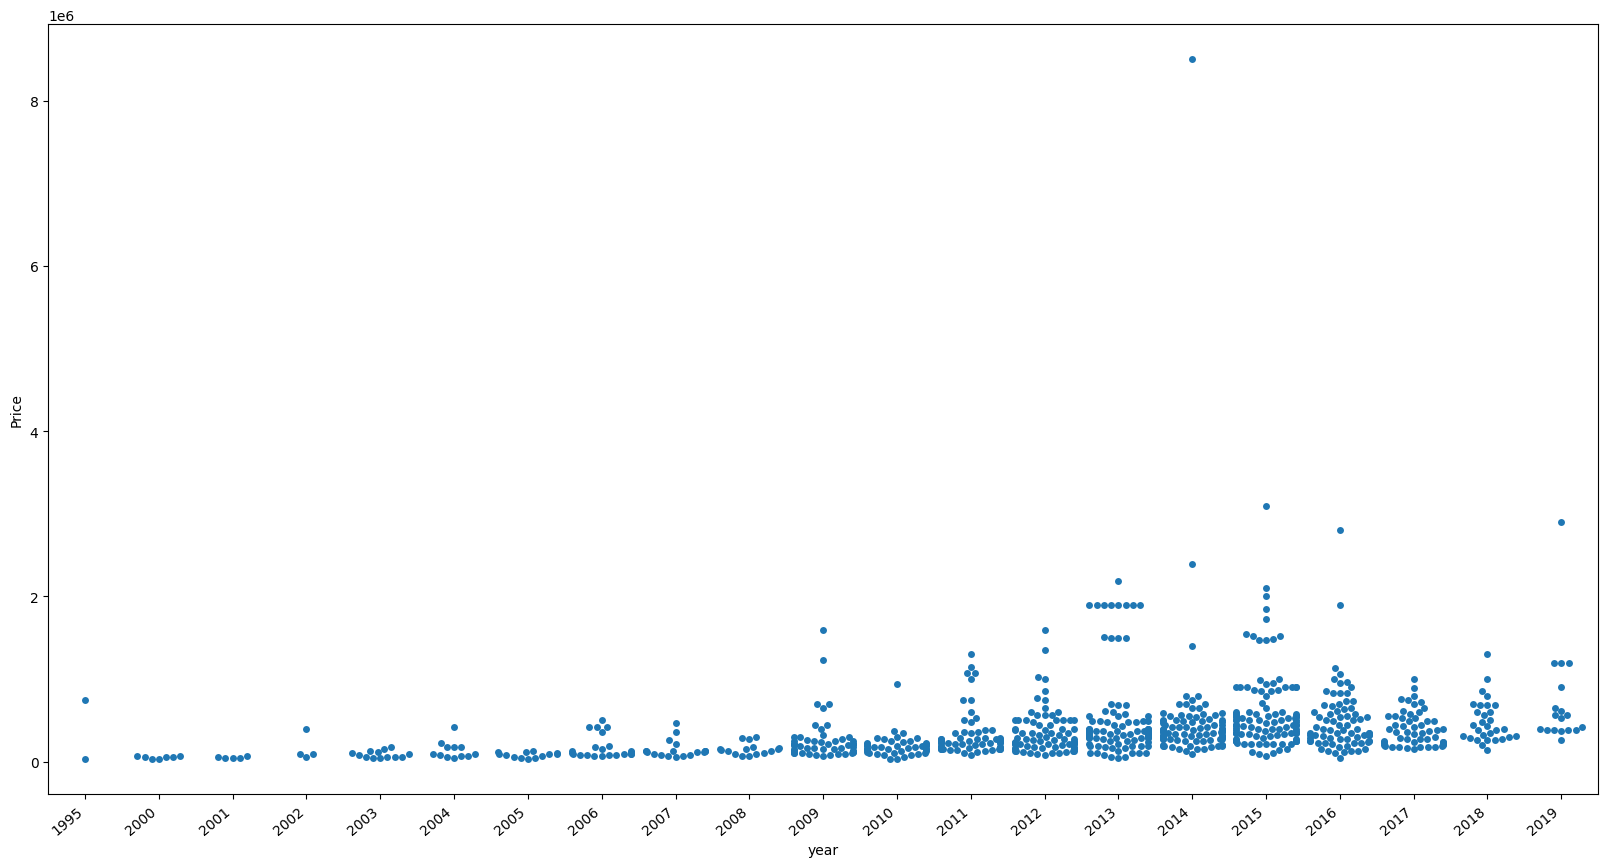

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, 'Hyundai'),
  Text(1, 0, 'Mahindra'),
  Text(2, 0, 'Ford'),
  Text(3, 0, 'Maruti'),
  Text(4, 0, 'Skoda'),
  Text(5, 0, 'Audi'),
  Text(6, 0, 'Toyota'),
  Text(7, 0, 'Renault'),
  Text(8, 0, 'Honda'),
  Text(9, 0, 'Datsun'),
  Text(10, 0, 'Mitsubishi'),
  Text(11, 0, 'Tata'),
  Text(12, 0, 'Volkswagen'),
  Text(13, 0, 'Chevrolet'),
  Text(14, 0, 'Mini'),
  Text(15, 0, 'BMW'),
  Text(16, 0, 'Nissan'),
  Text(17, 0, 'Hindustan'),
  Text(18, 0, 'Fiat'),
  Text(19, 0, 'Force'),
  Text(20, 0, 'Mercedes'),
  Text(21, 0, 'Land'),
  Text(22, 0, 'Jaguar'),
  Text(23, 0, 'Jeep'),
  Text(24, 0, 'Volvo')])

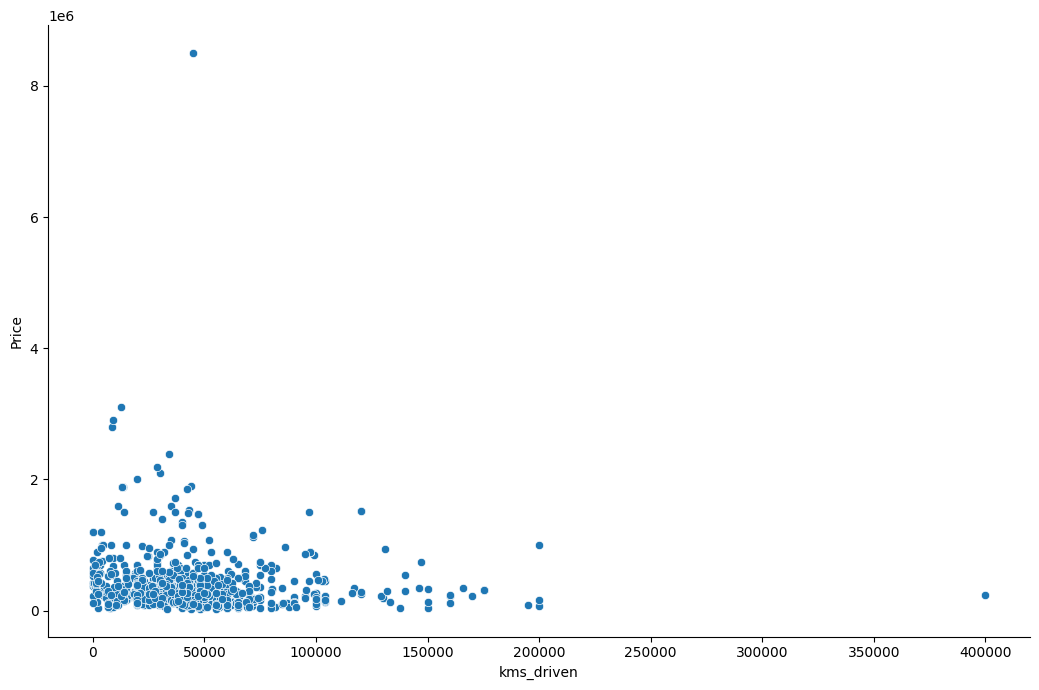

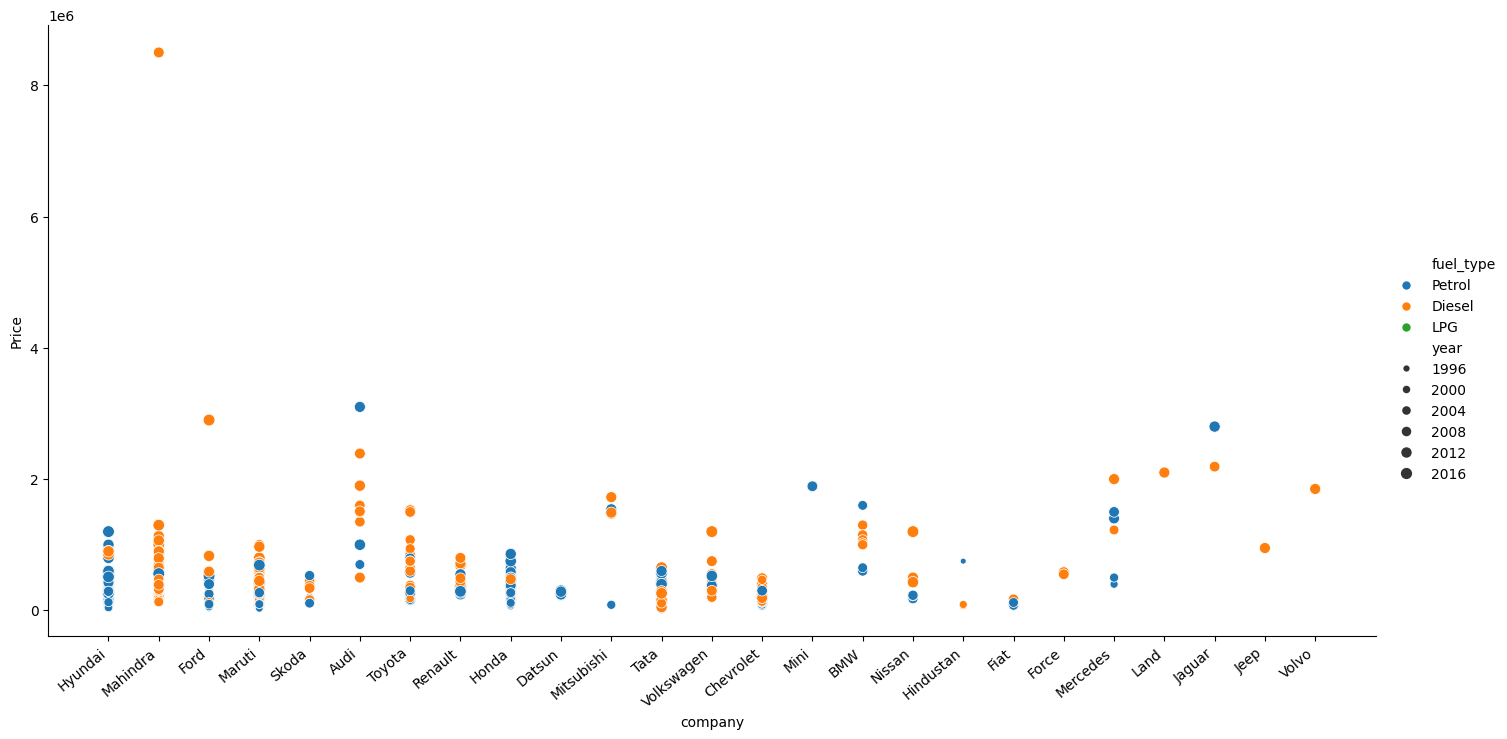

In [7]:
# Data visualization
plt.figure(figsize=(15, 7))
sns.boxplot(x='company', y='Price', data=cars_data)
plt.xticks(rotation=40, ha='right')
plt.show()

plt.figure(figsize=(20, 10))
sns.swarmplot(x='year', y='Price', data=cars_data)
plt.xticks(rotation=40, ha='right')
plt.show()

sns.relplot(x='kms_driven', y='Price', data=cars_data, height=7, aspect=1.5)

sns.relplot(x='company', y='Price', data=cars_data, hue='fuel_type', size='year', height=7, aspect=2)
plt.xticks(rotation=40, ha='right')



In [8]:
# Split data into features and target
X = cars_data[['name', 'company', 'year', 'kms_driven', 'fuel_type']]
y = cars_data['Price']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# One-hot encode categorical features
ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

# Apply transformations
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
                                       remainder='passthrough')

# Create a pipeline for linear regression model
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)

# Train the model
pipe.fit(X_train, y_train)

# Make predictions
y_pred = pipe.predict(X_test)

# Evaluate model performance
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# Cross-validation
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=i)
    lr = LinearRegression()
    pipe = make_pipeline(column_trans, lr)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    scores.append(r2_score(y_test, y_pred))

best_random_state = np.argmax(scores)
best_score = scores[best_random_state]
print("Best random state:", best_random_state)
print("Corresponding score:", best_score)

# Predict with a sample data point
sample_data = pd.DataFrame(columns=X_test.columns,
                            data=np.array(['Maruti Suzuki Swift', 'Maruti', 2019, 100, 'Petrol']).reshape(1, 5))
predicted_price = pipe.predict(sample_data)
print("Predicted price for the sample data:", predicted_price)

# Re-train the model with the best random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=best_random_state)
lr = LinearRegression()
pipe = make_pipeline(column_trans, lr)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
r2_best = r2_score(y_test, y_pred)
print("R-squared score with best random state:", r2_best)


R-squared score: 0.6310329905154948
Best random state: 247
Corresponding score: 0.8769652504752155
Predicted price for the sample data: [453164.68042877]
R-squared score with best random state: 0.8769652504752155


In [ ]:
while True:
    print("Enter car details:")
    name = input("Name of the car: ")
    company = input("Company: ")
    year = int(input("Year: "))
    kms_driven = int(input("Kilometers driven: "))
    fuel_type = input("Fuel type: ")

    sample_data = pd.DataFrame(columns=X_test.columns,
                                data=np.array([name, company, year, kms_driven, fuel_type]).reshape(1, 5))

    predicted_price = pipe.predict(sample_data)

    print("Predicted price for the car:", predicted_price[0])

    choice = input("Do you want to predict another car's price? (yes/no): ")
    if choice.lower() != 'yes':
        break


Enter car details:
Name of the car: Mahindra Jeep CL550
Company: Mahindra
Year: 2018
Kilometers driven: 20000
Fuel type: Petrol
Predicted price for the car: 442394.92164207995
